<a href="https://colab.research.google.com/github/Aadiya-Pokhrel/freecodecamp_projects/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# # Import data

In [ ]:

df = pd.read_csv('medical_examination.csv')

# # Add 'overweight' column

In [ ]:
df['overweight'] = np.where((df['weight']/(df['height']/100)**2)
                       >25 , 1,0 )

In [ ]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


# # Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.


In [ ]:
df['cholesterol']= np.where(df['cholesterol']
                               >1, 1,0 )

In [ ]:
df['gluc']= np.where(df['gluc']
                      >1, 1,0 )

In [ ]:
df.tail()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1
99999,20540,1,170,72.0,120,80,1,0,0,0,1,0,0


# # Draw Categorical Plot

In [ ]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

    df_cat = pd.melt(df,id_vars='cardio', value_vars= ['active','alco','cholesterol','gluc','overweight','smoke'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    #df_cat = None

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data = df_cat, kind='count',  x='variable', hue='value', col='cardio').set(ylabel = 'total').fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

# # Draw Heat Map

In [ ]:
def draw_heat_map():
    # 11
    df_heat = df[((df['height'] >= df['height'].quantile(0.025)) &
                  (df['height'] <= df['height'].quantile(0.975)) &
                  (df['weight'] >= df['weight'].quantile(0.025)) &
                  (df['weight'] <= df['weight'].quantile(0.975)))]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu((corr))



    # 14
    fig, ax = plt.subplots(figsize=(20, 15))

    # 15

    ax = sns.heatmap(data = corr, vmin = -0.5, vmax = 1, cmap ='inferno', annot= True, annot_kws= {'fontsize': '12', 'fontweight':'bold'}, square = True, linewidths = 0.8, linecolor = 'white', cbar = True, mask = mask)

    # 16
    fig.savefig('heatmap.png')
    return fig


C:\Users\POKHREL\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


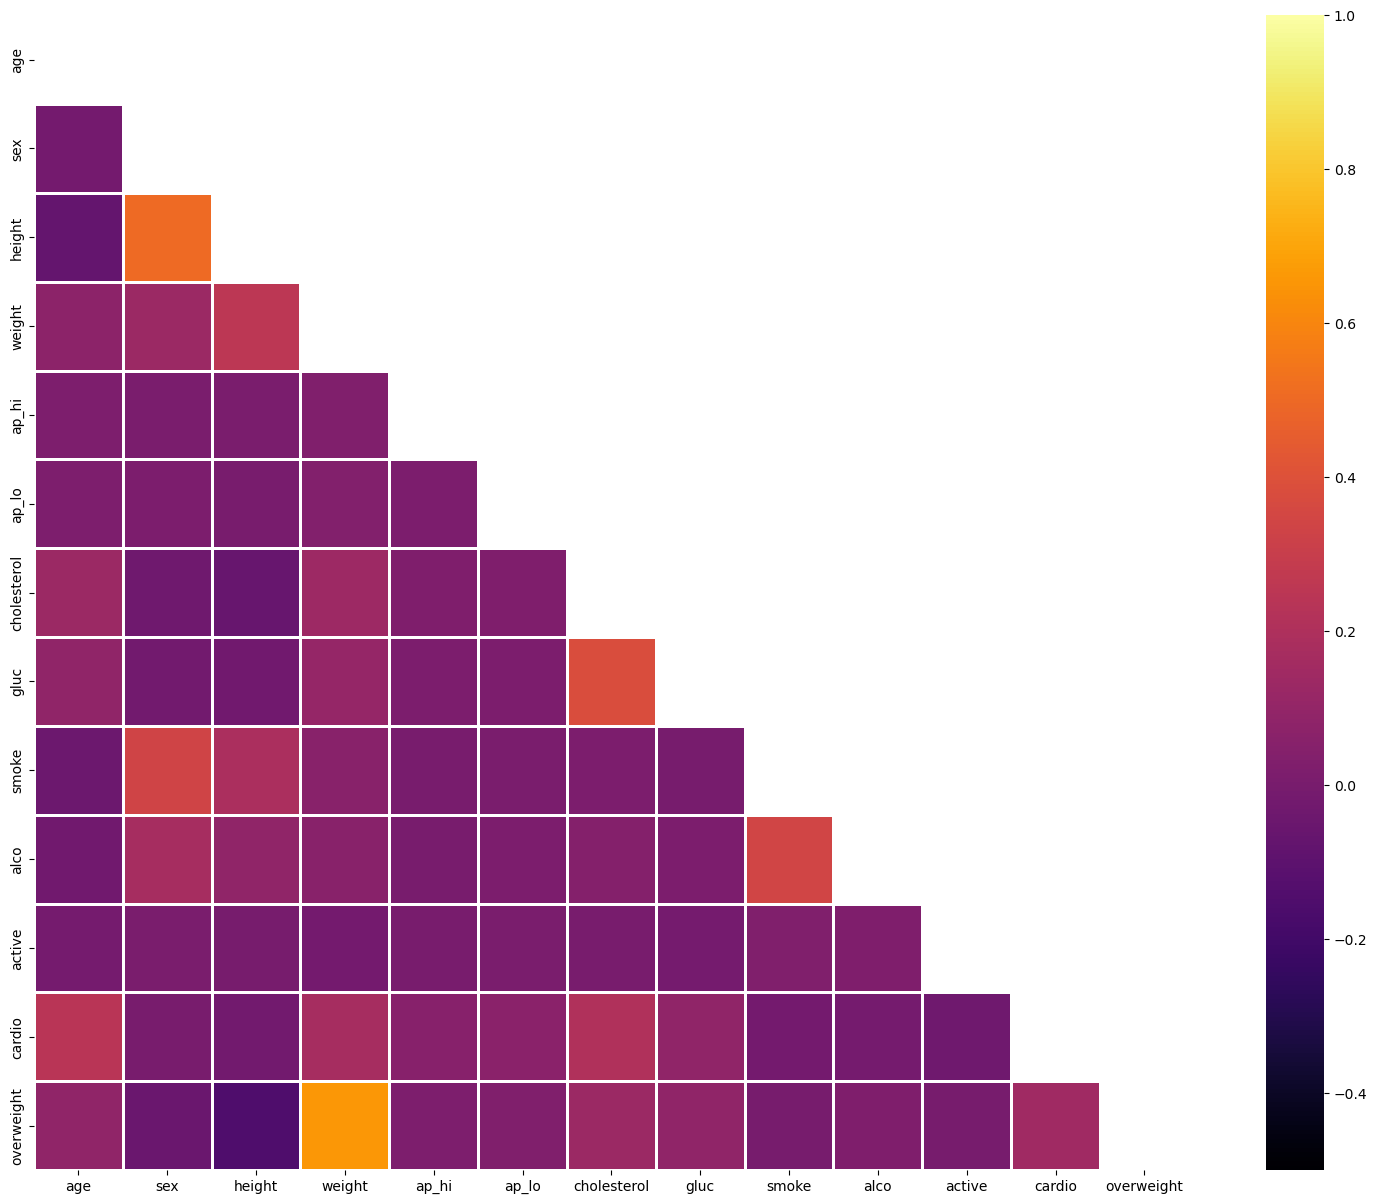

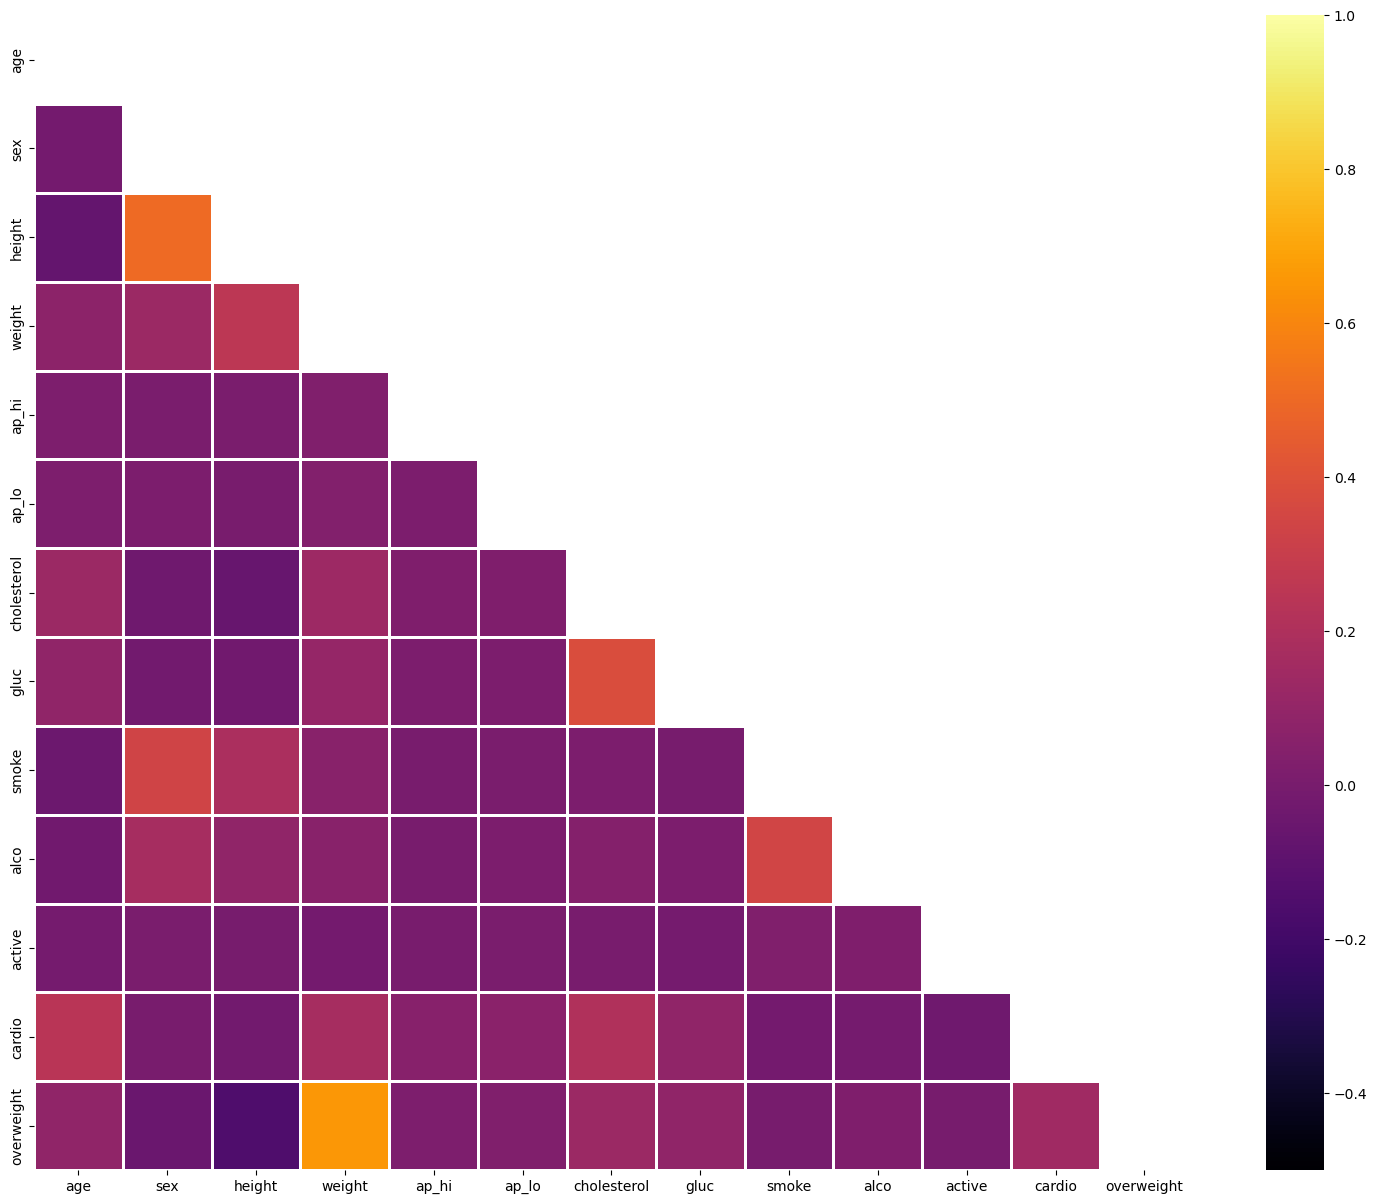

In [ ]:
draw_heat_map()